In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import sys
import os
myDir = os.path.join(os.getcwd(), '../..')
sys.path.append(myDir)
addDir = os.path.join(os.getcwd(), '../../../..')
sys.path.append(addDir)
print(addDir)
import eaopack as eao

c:\Users\jalbrecht\Documents\Programmierung\EAO_CHP\doc\source\samples\intervall_optimization\../../../..


In [2]:
def plot_results(portfolio, op, res, prices, num_imgs_per_row=3):
    out = eao.io.extract_output(portfolio, op, res, prices)
    num_nodes = len(portfolio.nodes)
    num_img_rows=int(np.ceil((num_nodes+2)/num_imgs_per_row))
    fig, ax = plt.subplots(num_img_rows, num_imgs_per_row, tight_layout = True, figsize=(18,5*num_img_rows))
    ax = ax.reshape(-1)

    # Plot the dispatch for each node:
    current_ax=0
    dispatch_per_node = {node: [] for node in portfolio.nodes}
    for mycol in out['dispatch'].columns.values:
        for node in dispatch_per_node:
            if '(' + node + ')' in mycol:
                dispatch_per_node[node].append(mycol)
    for node in dispatch_per_node:
        out['dispatch'][dispatch_per_node[node]].plot(ax=ax[current_ax], style='-x')
        ax[current_ax].set_title("Dispatch " + node)
        current_ax+=1

    # Plot internal variables:
    for v in out['internal_variables']:
        out['internal_variables'][v].plot(ax=ax[current_ax], style='-x', label=v)
    if out['internal_variables'].shape[1] == 0:
        ax[current_ax].text(0.4, 0.5, "No bool variables present")
    ax[current_ax].set_title('Bool Variables')
    ax[current_ax].legend()
    current_ax+=1

    # Plot prices
    for key in out['prices']:
        out['prices'][key].plot(ax=ax[current_ax], style='-x', label=key)
    ax[current_ax].set_title('Prices')
    ax[current_ax].legend()

    # Remove empty axes:
    for i in range(current_ax+1, len(ax)):
        fig.delaxes(ax[i])

In [3]:
prices = {
    "price_gas": {
        "2021-01-01T00:00:00.000": 2.0,
        "2021-01-01T01:00:00.000": 2.0,
        "2021-01-01T02:00:00.000": 2.0,
        "2021-01-01T03:00:00.000": 2.0,
        "2021-01-01T04:00:00.000": 2.0,
        "2021-01-01T05:00:00.000": 2.0,
        "2021-01-01T06:00:00.000": 2.0,
        "2021-01-01T07:00:00.000": 2.0,
        "2021-01-01T08:00:00.000": 2.0,
        "2021-01-01T09:00:00.000": 2.0,
        "2021-01-01T10:00:00.000": 2.0,
        "2021-01-01T11:00:00.000": 2.0,
        "2021-01-01T12:00:00.000": 2.0,
        "2021-01-01T13:00:00.000": 2.0,
        "2021-01-01T14:00:00.000": 2.0,
        "2021-01-01T15:00:00.000": 2.0,
        "2021-01-01T16:00:00.000": 2.0,
        "2021-01-01T17:00:00.000": 2.0,
        "2021-01-01T18:00:00.000": 2.0,
        "2021-01-01T19:00:00.000": 2.0,
        "2021-01-01T20:00:00.000": 2.0,
        "2021-01-01T21:00:00.000": 2.0,
        "2021-01-01T22:00:00.000": 2.0,
        "2021-01-01T23:00:00.000": 2.0
    },
    "price_heat": {
        "2021-01-01T00:00:00.000": 3.0,
        "2021-01-01T01:00:00.000": 2.8806896369,
        "2021-01-01T02:00:00.000": 2.5512284731,
        "2021-01-01T03:00:00.000": 2.0902327707,
        "2021-01-01T04:00:00.000": 1.607705659,
        "2021-01-01T05:00:00.000": 1.2187881079,
        "2021-01-01T06:00:00.000": 1.0162839058,
        "2021-01-01T07:00:00.000": 1.0485147525,
        "2021-01-01T08:00:00.000": 1.3077897,
        "2021-01-01T09:00:00.000": 1.7322403719,
        "2021-01-01T10:00:00.000": 2.2205840407,
        "2021-01-01T11:00:00.000": 2.6562917856,
        "2021-01-01T12:00:00.000": 2.935394708,
        "2021-01-01T13:00:00.000": 2.9912930658,
        "2021-01-01T14:00:00.000": 2.8106483524,
        "2021-01-01T15:00:00.000": 2.4365661404,
        "2021-01-01T16:00:00.000": 1.958310199,
        "2021-01-01T17:00:00.000": 1.4900023081,
        "2021-01-01T18:00:00.000": 1.1433904369,
        "2021-01-01T19:00:00.000": 1.0011833617,
        "2021-01-01T20:00:00.000": 1.0973146381,
        "2021-01-01T21:00:00.000": 1.4088453511,
        "2021-01-01T22:00:00.000": 1.8614378157,
        "2021-01-01T23:00:00.000": 2.3470940894
    },
    "price_power": {
        "2021-01-01T00:00:00.000": 2.0,
        "2021-01-01T01:00:00.000": 2.4736937444,
        "2021-01-01T02:00:00.000": 2.8343543435,
        "2021-01-01T03:00:00.000": 2.9959207032,
        "2021-01-01T04:00:00.000": 2.9198397415,
        "2021-01-01T05:00:00.000": 2.6242659526,
        "2021-01-01T06:00:00.000": 2.1797293688,
        "2021-01-01T07:00:00.000": 1.6923056325,
        "2021-01-01T08:00:00.000": 1.2783041496,
        "2021-01-01T09:00:00.000": 1.0365142546,
        "2021-01-01T10:00:00.000": 1.0246320279,
        "2021-01-01T11:00:00.000": 1.245492815,
        "2021-01-01T12:00:00.000": 1.6463946546,
        "2021-01-01T13:00:00.000": 2.1316740584,
        "2021-01-01T14:00:00.000": 2.5855333029,
        "2021-01-01T15:00:00.000": 2.8996721653,
        "2021-01-01T16:00:00.000": 2.9991306023,
        "2021-01-01T17:00:00.000": 2.8601757694,
        "2021-01-01T18:00:00.000": 2.5159651697,
        "2021-01-01T19:00:00.000": 2.0486345865,
        "2021-01-01T20:00:00.000": 1.569698783,
        "2021-01-01T21:00:00.000": 1.1934417683,
        "2021-01-01T22:00:00.000": 1.0096462647,
        "2021-01-01T23:00:00.000": 1.0621696885
    }
}
timegrid = eao.assets.Timegrid(dt.date(2021, 1, 1), dt.date(2021, 1, 2), freq='h', main_time_unit='h')

# prices = {
#     'price_gas': np.ones(timegrid.T)*2,
#     'price_heat': np.cos(0.5*np.pi * np.arange(timegrid.T)*np.pi/10)+2,
#     'price_power': np.sin(0.5*np.pi * np.arange(timegrid.T)*np.pi/10)+2,          
# }

prices = timegrid.prices_to_grid(prices)

node_power = eao.assets.Node('node_power')
node_heat = eao.assets.Node('node_heat')
node_gas = eao.assets.Node('node_gas')

simple_contract_power = eao.assets.SimpleContract(name='SC_power', price='price_power', nodes=node_power,
                                             min_cap=-30., max_cap=20)
simple_contract_heat = eao.assets.SimpleContract(name='SC_heat', price='price_heat', nodes=node_heat,
                                             min_cap=-30., max_cap=20.)
simple_contract_gas = eao.assets.SimpleContract(name='SC_gas', price='price_gas', nodes=node_gas,
                                             min_cap=-30., max_cap=20.)


chpasset = eao.assets.CHPAsset(name='CHP',
                               nodes=[node_power, node_heat, node_gas],
                               min_cap=5.,
                               max_cap=30.,
                               ramp=10)
portfolio = eao.portfolio.Portfolio([chpasset, simple_contract_power, simple_contract_heat, simple_contract_gas])

In [4]:
op_intervall, res_intervall = portfolio.optimize_intervals(prices, timegrid, "5h30min", solver='GLPK_MI')

...MIP problem configured. Beware of potentially long optimization and other issues inherent to MIP
...MIP problem configured. Beware of potentially long optimization and other issues inherent to MIP
...MIP problem configured. Beware of potentially long optimization and other issues inherent to MIP
...MIP problem configured. Beware of potentially long optimization and other issues inherent to MIP
...MIP problem configured. Beware of potentially long optimization and other issues inherent to MIP


Value: 223.35390427900006


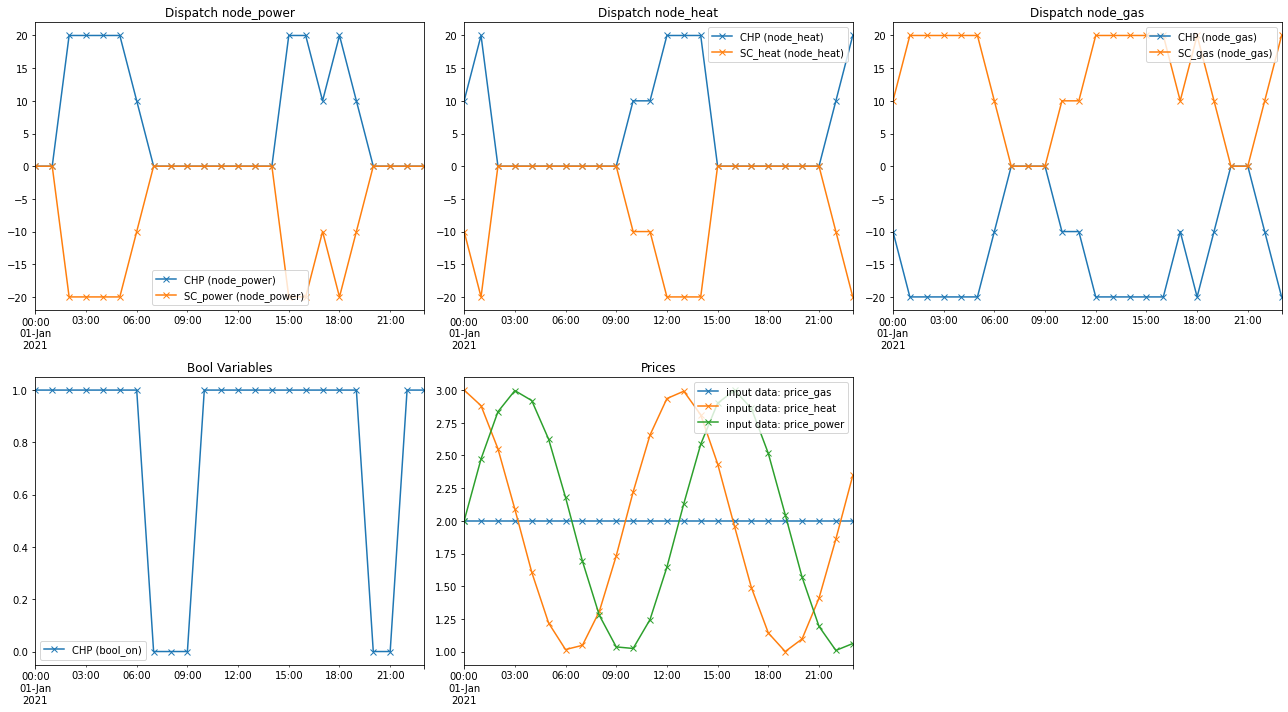

In [5]:
print("Value:", res_intervall.value)
plot_results(portfolio, op_intervall, res_intervall, prices)

In [6]:
op_full = portfolio.setup_optim_problem(prices, timegrid)
res_full = op_full.optimize(solver="GLPK_MI")

...MIP problem configured. Beware of potentially long optimization and other issues inherent to MIP


Value: 238.51857982899998


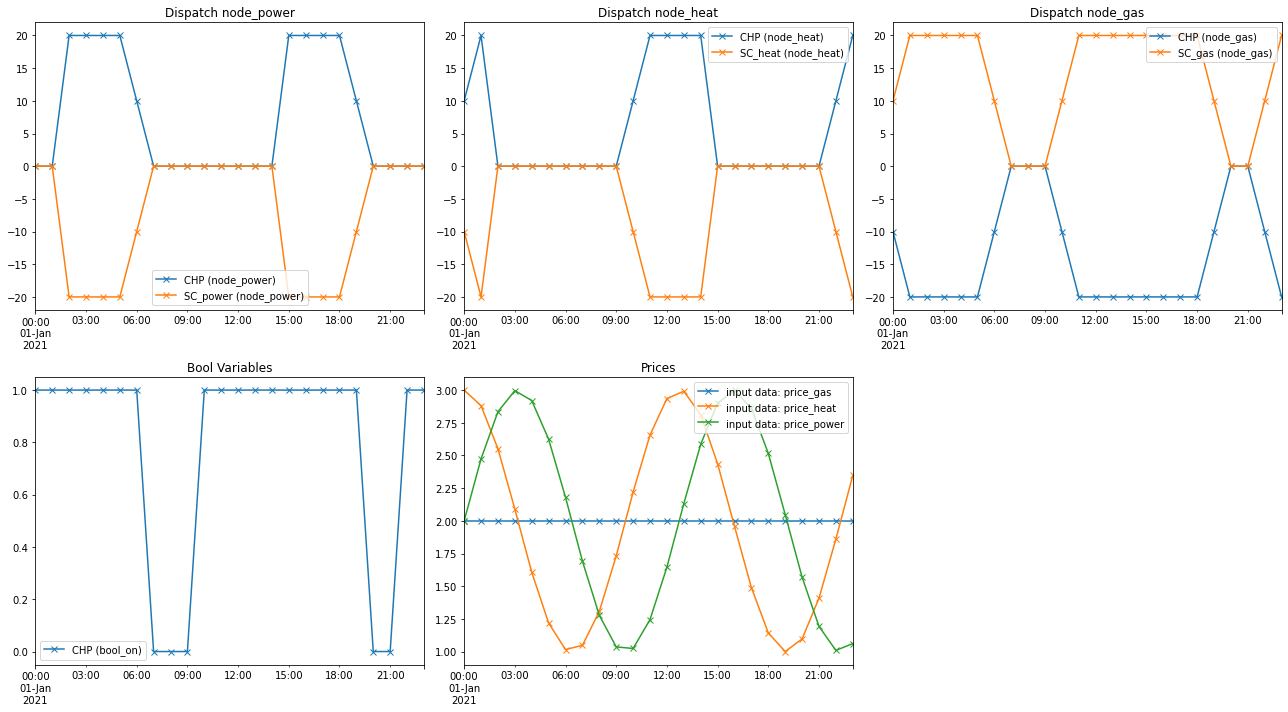

In [7]:
print("Value:", res_full.value)
plot_results(portfolio, op_full, res_full, prices)